In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/table_CUSTOMERORDERS.csv')

In [ ]:
df.head(5)

,Order_Date,Delivery_Date,Quantity,RetailPrice,Cost,Discount,OrderTypeLabel,Continent,State_Code,StateName,...,MonthName,Customer_Name,Customer_BirthDate,Customer_Age_Group,Customer_Type,Customer_Group,Customer_Age,CustomerGenderLabel,CustomerCountryLabel,Profit
0,01-Jan-07,07-Jan-07,3,$28.50,$4.55,.,Internet Sale,Australia/Pacific,NaN,NaN,...,January,Wendy Diab,08-May-73,31-45 years,Internet/Catalog Customers,Internet/Catalog Customers,38.0,Female,Australia,$14.85
1,01-Jan-07,04-Jan-07,2,$113.40,$28.45,.,Internet Sale,Australia/Pacific,NaN,NaN,...,January,Ande Mika,13-Dec-73,31-45 years,Orion Club Gold members high activity,Orion Club Gold members,38.0,Male,Australia,$56.50
2,01-Jan-07,04-Jan-07,2,$41.00,$9.25,.,Internet Sale,Australia/Pacific,NaN,NaN,...,January,Ande Mika,13-Dec-73,31-45 years,Orion Club Gold members high activity,Orion Club Gold members,38.0,Male,Australia,$22.50
3,01-Jan-07,03-Jan-07,1,$35.20,$14.80,.,Internet Sale,Australia/Pacific,NaN,NaN,...,January,Indu Mele,22-Jun-92,15-30 years,Orion Club Gold members high activity,Orion Club Gold members,19.0,Female,Australia,$20.40
4,01-Jan-07,04-Jan-07,1,$24.70,$11.80,.,Internet Sale,North America,NaN,Quebec,...,January,Suzanne Creasy,28-Jan-73,31-45 years,Orion Club Gold members medium activity,Orion Club Gold members,38.0,Female,Canada,$12.90


In [ ]:
df.isnull().sum()

,0
Order_Date,0
Delivery_Date,0
Quantity,0
RetailPrice,0
Cost,0
Discount,0
OrderTypeLabel,0
Continent,0
State_Code,54401
StateName,39765


In [ ]:
df_numeric = df.select_dtypes(include=np.number)

In [ ]:
df_numeric.fillna(df_numeric.median(), inplace=True)

In [ ]:
df_non_numeric = df.select_dtypes(exclude=np.number)

In [ ]:
df = pd.concat([df_numeric, df_non_numeric], axis=1)

In [ ]:
df['RetailPrice'] = df['RetailPrice'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
df['Cost'] = df['Cost'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
df['Profit'] = df['Profit'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df.replace(['.', ' ', '   .', 'nan'], np.nan, inplace=True)

<ipython-input-34-fa080b2d3f01>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['.', ' ', '   .', 'nan'], np.nan, inplace=True)


In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
df.dropna(subset=['Profit'], inplace=True)

In [ ]:
df['Discount'].fillna(0, inplace=True)

<ipython-input-72-b77f6e0b5cfc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount'].fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71639 entries, 0 to 71638
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_Date            71639 non-null  object 
 1   Delivery_Date         71639 non-null  object 
 2   Quantity              71639 non-null  int64  
 3   RetailPrice           71639 non-null  object 
 4   Cost                  71639 non-null  object 
 5   Discount              71639 non-null  object 
 6   OrderTypeLabel        71639 non-null  object 
 7   Continent             71639 non-null  object 
 8   State_Code            17238 non-null  object 
 9   StateName             31874 non-null  object 
 10  Region                29097 non-null  object 
 11  City                  71617 non-null  object 
 12  Postal_Code           71290 non-null  object 
 13  CountryLabel          71639 non-null  object 
 14  Year                  71639 non-null  int64  
 15  Quarter            

In [ ]:
df.describe()

,Quantity,Year,Quarter,Month,Customer_Age
count,71639.000000,71639.0,71639.000000,71639.000000,71638.000000
mean,1.531847,2007.0,1.518907,3.472033,41.012075
std,0.845295,0.0,0.499646,1.661110,16.404731
min,1.000000,2007.0,1.000000,1.000000,19.000000
25%,1.000000,2007.0,1.000000,2.000000,23.000000
50%,1.000000,2007.0,2.000000,4.000000,38.000000
75%,2.000000,2007.0,2.000000,5.000000,53.000000
max,9.000000,2007.0,2.000000,6.000000,73.000000


In [ ]:
df.columns

Index(['Order_Date', 'Delivery_Date', 'Quantity', 'RetailPrice', 'Cost',
       'Discount', 'OrderTypeLabel', 'Continent', 'State_Code', 'StateName',
       'Region', 'City', 'Postal_Code', 'CountryLabel', 'Year', 'Quarter',
       'Month', 'MonthName', 'Customer_Name', 'Customer_BirthDate',
       'Customer_Age_Group', 'Customer_Type', 'Customer_Group', 'Customer_Age',
       'CustomerGenderLabel', 'CustomerCountryLabel', 'Profit'],
      dtype='object')

In [ ]:
print(df['Discount'].isnull().sum())

71638


<Axes: ylabel='Profit'>

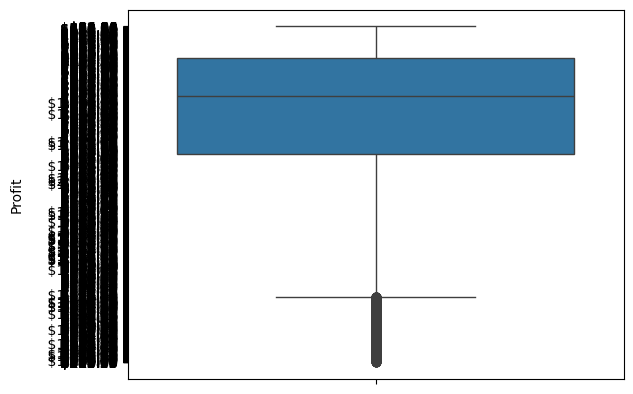

In [ ]:
sns.boxplot(df['Profit'])

In [ ]:
X = df[['RetailPrice', 'Cost', 'Quantity']]
X = imputer.fit_transform(X)
y = df['Profit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error (MSE): 160.34814137206007
R-Squared: 0.9828892407033031


In [ ]:
intercept = regressor.intercept_

In [ ]:
coefficients = regressor.coef_

In [ ]:
print(f"Intercept: {intercept}")
print(f"RetailPrice Coefficient: {coefficients[0]}")
print(f"Cost Coefficient: {coefficients[1]}")
print(f"Quantity Coefficient: {coefficients[2]}")

Intercept: 8.613422528924126
RetailPrice Coefficient: 0.5706920366793234
Cost Coefficient: -0.21859675436028286
Quantity Coefficient: -3.296042536667617
